In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision.models import resnet18
import torchvision
import imp 
LRP = imp.load_source('LRP', '../__init__.py')
from LRP import utils
from skimage import io
from skimage import transform 

In [2]:
model = resnet18(pretrained=True)
model = model.eval()
model = utils.redefine_nn(model)

(2187, 2187, 3)


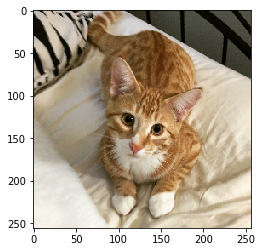

(256, 256, 3)


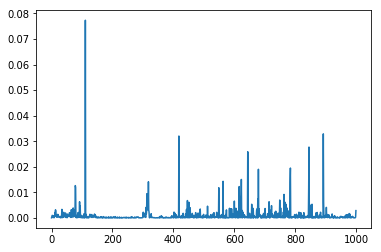

random input pred  tensor(111)


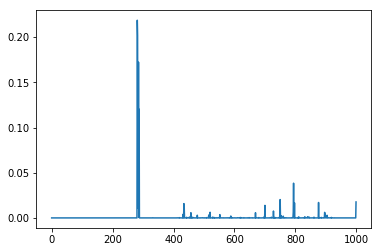

image input pred  tensor(281)


In [4]:
image = io.imread('image_cat.jpg')
# plt.imshow(image)
# plt.show()
# print(image.shape)
image = transform.resize(image, (256, 256), preserve_range=True).astype(np.uint8)
image.shape
plt.imshow(image)
plt.show()
print(image.shape)


image = image / 255

f = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# input_image = f(torch.tensor(image).permute(2,0,1)).unsqueeze(0).float()
input_image = torch.tensor(image).permute(2,0,1).unsqueeze(0).float()
output1 = model(torch.rand(1,3,256,256))
output2 = model(input_image)

plt.plot(torch.softmax(output1, dim=-1).squeeze().detach())
plt.show()
print('random input pred ', output1.argmax())
plt.plot(torch.softmax(output2, dim=-1).squeeze().detach())
plt.show()
print('image input pred ', output2.argmax())


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


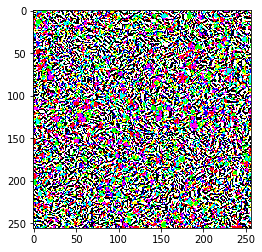

In [9]:
input1 = torch.rand(1,3,256,256)
input1.requires_grad_(True)
output1 = model(input1)
output1.backward((output1==output1.max()).float())
plt.imshow(input1.grad.squeeze().log().permute(1,2,0))

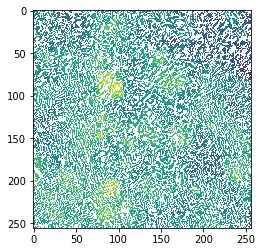

In [12]:
input2 = input_image
input2.requires_grad_(True)
output2 = model(input2)
output2.backward((output2==output2.max()).float())
plt.imshow(input2.grad.squeeze().log().permute(1,2,0)[:,:,0])

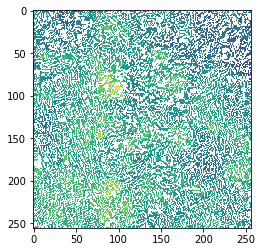

In [13]:
plt.imshow(input2.grad.squeeze().log().permute(1,2,0)[:,:,1])

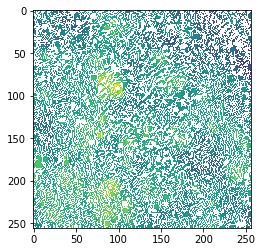

In [15]:
plt.imshow(input2.grad.squeeze().log().permute(1,2,0)[:,:,2])

In [36]:
class Foo(object):
    some_var = 'fds'
    def bar(self):
        print(globals())

In [37]:
a = Foo()
a.bar()

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "class Foo(object):\n    @staticmethod\n    def foo():\n        print('hello')", 'Foo.foo()', "class Foo(object):\n    def __init__(self):\n        self.__call__ = self.foo\n    @staticmethod\n    def foo():\n        print('hello')", 'Foo.foo()', 'Foo.foo()\nobj_foo = Foo()\nobj_foo()', "class Foo(object):\n    def __init__(self):\n        self.__call__ = self.foo\n    @staticmethod\n    def foo():\n        print('hello')", 'Foo.foo()\nobj_foo = Foo()\nobj_foo()', 'obj_foo.__dir__', 'obj_foo.__dir__()', 'obj_foo.__call__()', "class Foo(object):\n    def __init__(self):\n        self.__call__ = self.foo\n#     @staticmethod\n    def foo():\n        print('hello')", 'Foo.foo()\nobj_foo = Foo()\nobj_foo()', "class Foo(objec